In [27]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import struct

from math import sin, cos

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
sec = 10000000 / 400
min = sec / 60
h = min / 60

print(h)

6.944444444444445


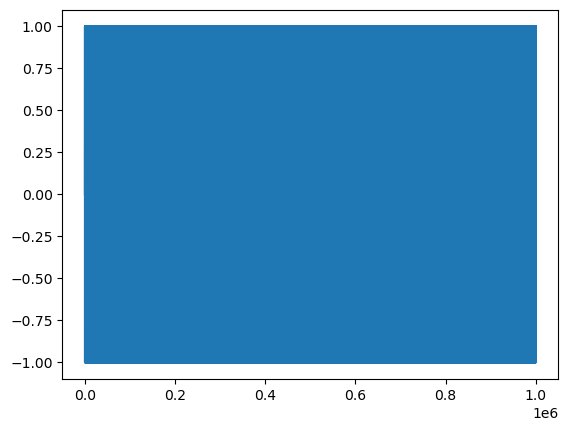

In [34]:
# Generate data
time = []
sin_x = []
cos_x = []

for i in range(0,1000000):
    time.append(i)
    sin_x.append(sin(i / 10))
    cos_x.append(cos(i / 10))


meta1 = {
    "name": "Test",
    "unit": "TestUnit",
    "datasetId": "63a5cf1c4884de8087e7cfff",
    "start": 2,
    "end": 10,
    "data": {
        "time": time,
        "values": sin_x
    }
}

plt.plot(time, sin_x)



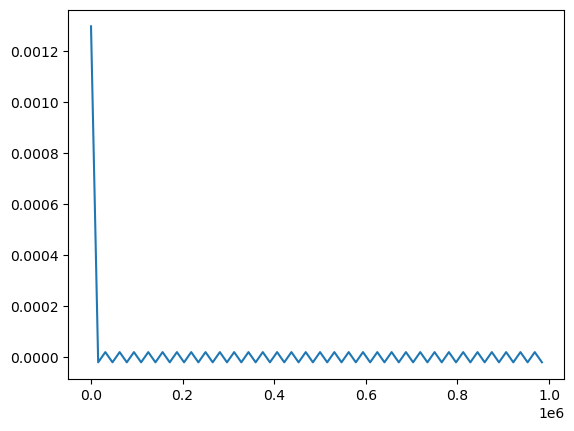

In [35]:
from scipy.signal import resample

[sin_new, t_new] = resample(sin_x, 64, t=time)

plt.plot(t_new, sin_new)

[     0.  55402.  55559. 111134. 166709. 222346. 277795. 333370. 388945.
 444457. 500032. 555669. 611118. 666693. 722268. 777780. 833355. 888929.
 944504. 999999.]
[ 0.         -0.99999908  0.99997817 -0.9998722   0.99925574 -0.99975788
  0.99945425 -0.99994547  0.99992616 -0.9998392   0.99917881 -0.9997988
  0.99951662 -0.99996389  0.99990063 -0.99980242  0.99909809 -0.99939002
  0.99992394  0.13533981]


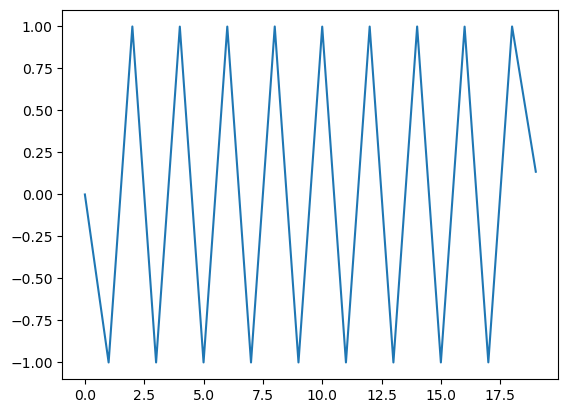

In [36]:
import lttbc
import numpy as np


# data = np.asarray([time, sin_x]).T
# print(data.shape)
[d, t] = lttbc.downsample(time, sin_x, 20)

print(d)
print(t)

plt.plot(t)

In [32]:
import numpy as np

with open("data_sin_1MIL.csv", "w") as f:
    f.write("time, sensor_sin\n")
    for (t, s, c) in zip(time, sin_x, cos_x):
        f.write(",".join([str(t), str(round(s, 2))]))
        f.write("\n")

In [33]:
# Write to bytearray
from src.controller import Controller

ctrl = Controller()

ctrl.addTimeSeries(meta1)

ImportError: cannot import name 'Controller' from 'src.controller' (/Users/king/Github/TSStore/src/controller/__init__.py)

In [ ]:
ts = ctrl.getTimeSeriesFull(datasetId="63a5cf1c4884de8087e7cfff")

In [ ]:
# Load series

from src.main import TSStore

store2 = TSStore(_id="123456")
store2.loadSeries()

ModuleNotFoundError: No module named 'src.main'

In [ ]:
timeCut, dataCut = store2.getPart(2, 5)

print(len(timeCut))

4
